In [ ]:
! pip install ucimlrepo

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# UCI dataset fetching
from ucimlrepo import fetch_ucirepo

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Handling imbalance
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Model evaluation
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)
from sklearn.calibration import calibration_curve

# Data Collection

In [ ]:
# Fetch dataset from https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset
dataset = fetch_ucirepo(id=468)
features = dataset.data.features
targets = dataset.data.targets

In [ ]:
# Combine features and targets into a single dataframe
df = pd.concat([features, targets], axis=1)

In [ ]:
# Display the first 5 row of the dataframe
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# Display the last 5 row of the dataframe
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


# Exploratory Data Analysis (EDA)

In [ ]:
# Display dataset shape
print("Dataset Shape:", df.shape)

Dataset Shape: (12330, 18)


In [ ]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# Display descriptive statistics for numerical features
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
# Check for missing/null values
df.isnull().any()

,0
Administrative,False
Administrative_Duration,False
Informational,False
Informational_Duration,False
ProductRelated,False
ProductRelated_Duration,False
BounceRates,False
ExitRates,False
PageValues,False
SpecialDay,False


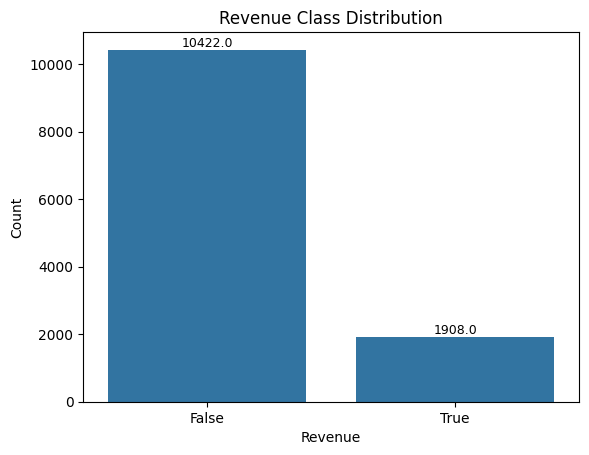


Revenue Class Distribution (%):
 Revenue
False    84.53
True     15.47
Name: proportion, dtype: float64


In [ ]:
# Plot target variable distribution
ax = sns.countplot(x='Revenue', data=df)
plt.title('Revenue Class Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')

# Add count labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.show()

# Calculate and display class percentages
revenue_pct = df['Revenue'].value_counts(normalize=True).mul(100).round(2)
print("\nRevenue Class Distribution (%):\n", revenue_pct)

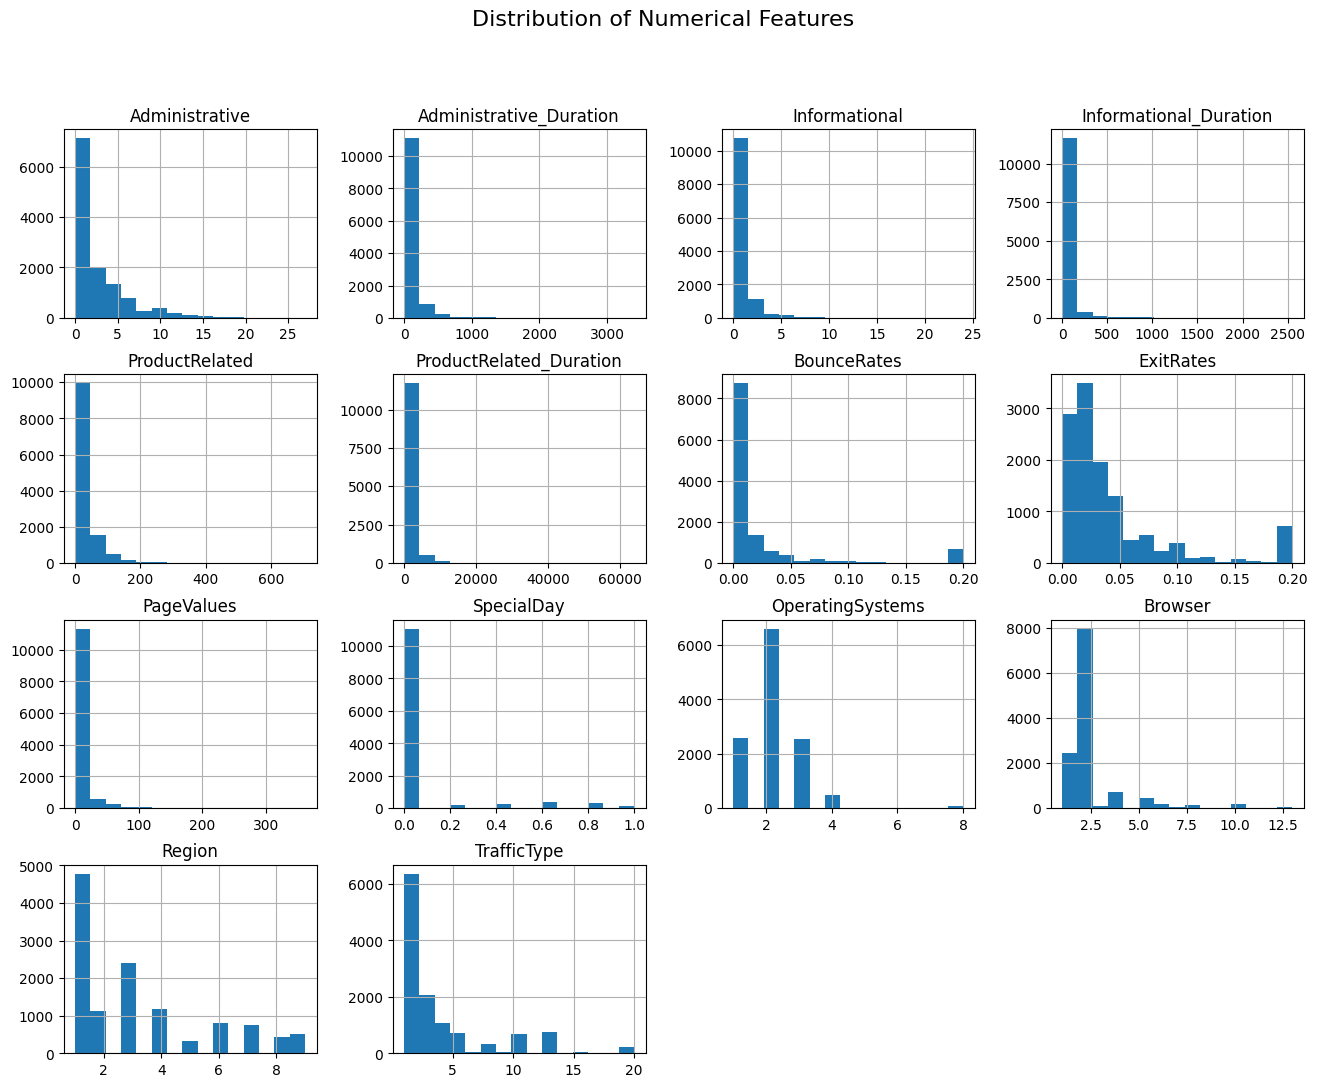

In [ ]:
# Select numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Plot histograms for numerical features
df[numerical_features].hist(bins=15, figsize=(16, 12))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

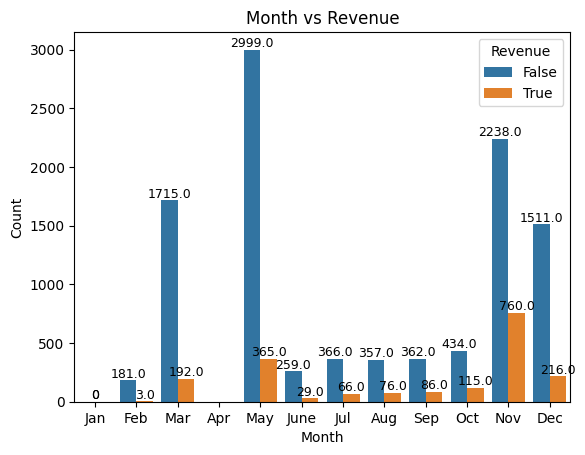

In [ ]:
# Plot 'Month' feature distribution by 'Revenue'
ax = sns.countplot(x='Month', hue='Revenue', data=df,
                   order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul',
                          'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.title('Month vs Revenue')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Revenue')

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.show()

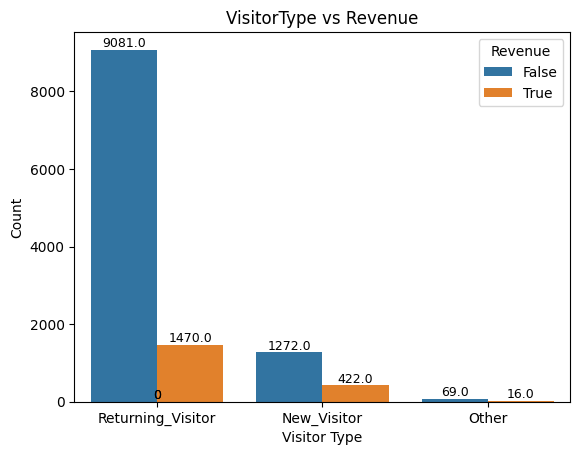


VisitorType Value Counts:
 VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


In [ ]:
# Plot distribution of 'VisitorType' feature with value labels
ax = sns.countplot(x='VisitorType', hue='Revenue', data=df)

plt.title('VisitorType vs Revenue')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.legend(title='Revenue')

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.show()

# Display value counts
print("\nVisitorType Value Counts:\n", df['VisitorType'].value_counts())

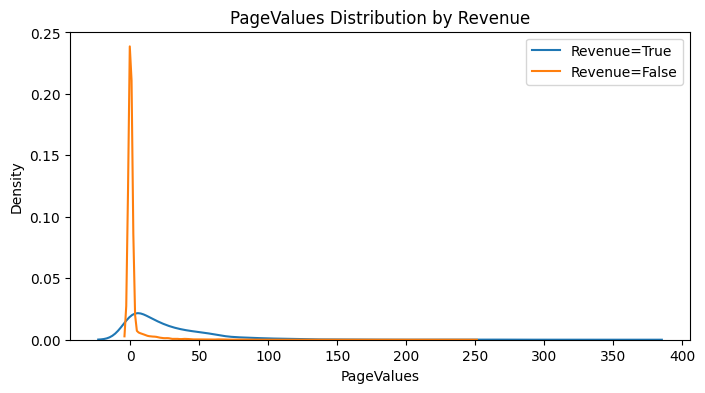

In [ ]:
# KDE plot for 'PageValues' feature by Revenue class
plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Revenue'] == True]['PageValues'], label='Revenue=True')
sns.kdeplot(df[df['Revenue'] == False]['PageValues'], label='Revenue=False')
plt.title('PageValues Distribution by Revenue')
plt.xlabel('PageValues')
plt.legend()
plt.show()

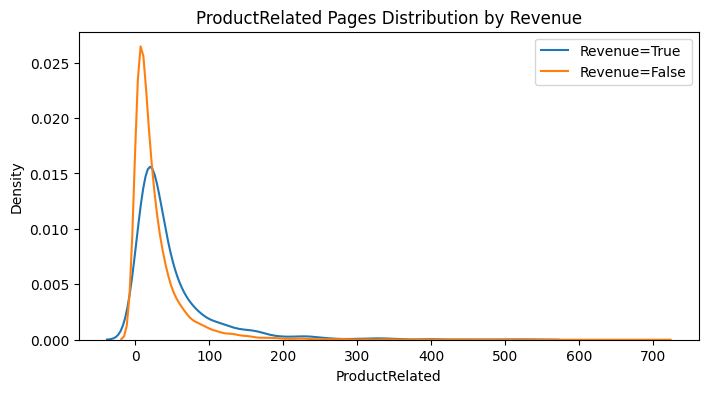

In [ ]:
# KDE plot for 'ProductRelated' feature by Revenue class
plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Revenue'] == True]['ProductRelated'], label='Revenue=True')
sns.kdeplot(df[df['Revenue'] == False]['ProductRelated'], label='Revenue=False')
plt.title('ProductRelated Pages Distribution by Revenue')
plt.xlabel('ProductRelated')
plt.legend()
plt.show()

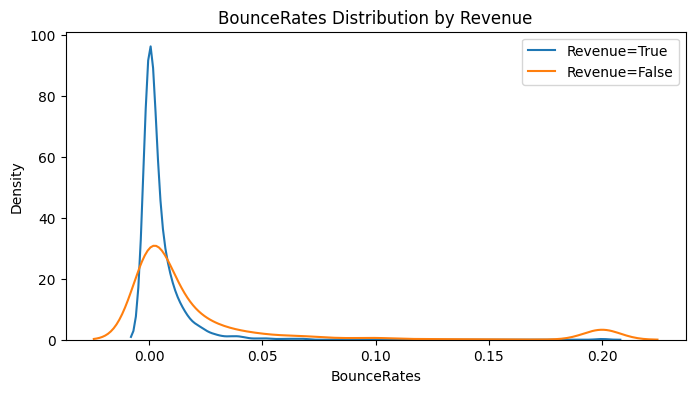

In [ ]:
# KDE plot for 'BounceRates' feature by Revenue class
plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Revenue'] == True]['BounceRates'], label='Revenue=True')
sns.kdeplot(df[df['Revenue'] == False]['BounceRates'], label='Revenue=False')
plt.title('BounceRates Distribution by Revenue')
plt.xlabel('BounceRates')
plt.legend()
plt.show()

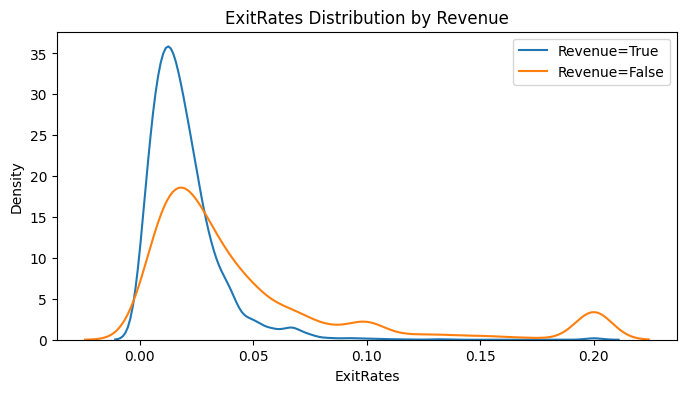

In [ ]:
# KDE plot for 'ExitRates' feature by Revenue class
plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Revenue'] == True]['ExitRates'], label='Revenue=True')
sns.kdeplot(df[df['Revenue'] == False]['ExitRates'], label='Revenue=False')
plt.title('ExitRates Distribution by Revenue')
plt.xlabel('ExitRates')
plt.legend()
plt.show()

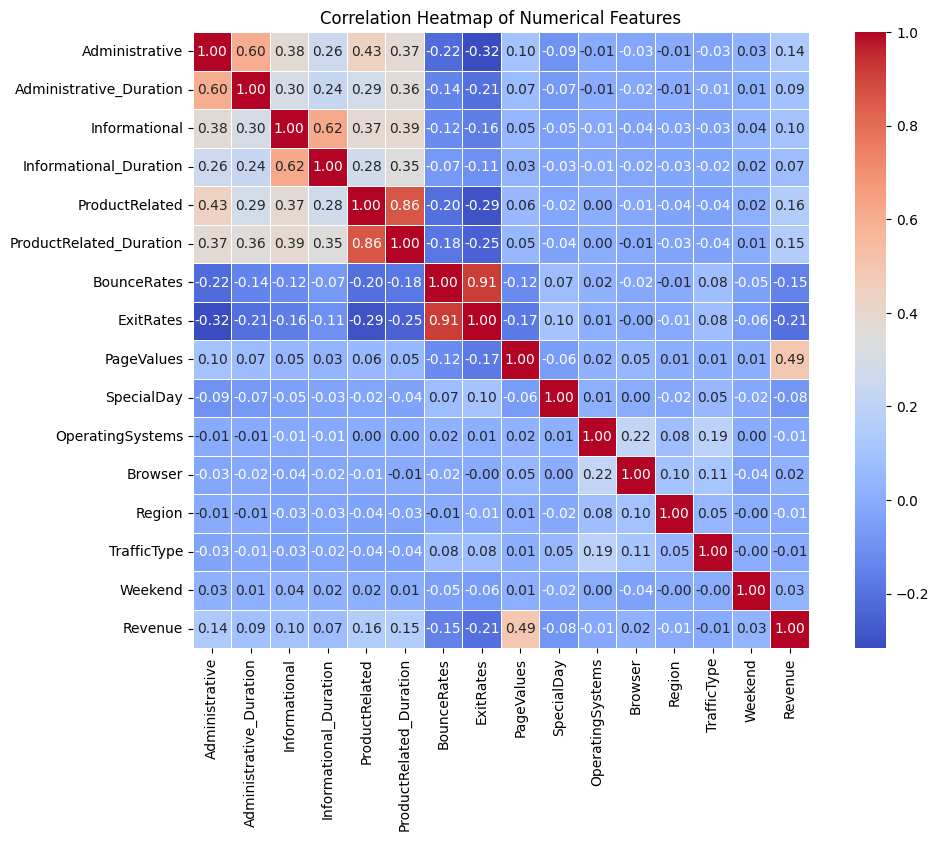

In [ ]:
# Compute correlation matrix for numerical features only
corr_matrix = df.corr(numeric_only=True)

# Plot a heatmap to visualize correlation between numerical features
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# Correlation of all numerical features with 'Revenue'
target_corr = corr_matrix['Revenue'].sort_values(ascending=False)

# Display sorted correlation values
print("Correlation of features with Revenue:")
print(target_corr)

Correlation of features with Revenue:
Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64


# Data Preprocessing / Preparation

In [ ]:
# Mapping month abbreviations to integer values
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }

# Apply the mapping
df['Month'] = df['Month'].map(month_mapping)
df['Month'] = df['Month'].astype(int)

# Display the first 5 row of the dataframe
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# Map visitor types to integers
visitor_mapping = {
    'New_Visitor': 0,
    'Returning_Visitor': 1,
    'Other': 2
}

# Apply the mapping
df['VisitorType'] = df['VisitorType'].map(visitor_mapping)

# Display the first 5 row of the dataframe
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,True,False


In [ ]:
# List of Boolean columns that need to be converted to integers
bool_cols = ['Weekend', 'Revenue']

# Convert each Boolean column to integer type
for col in bool_cols:
    df[col] = df[col].astype(int)

# Check data types to confirm successful conversion
print(df[bool_cols].dtypes)

Weekend    int64
Revenue    int64
dtype: object


In [ ]:
# Dropping unnecessary columns
df = df.drop(['Browser', 'OperatingSystems', 'Region', 'TrafficType'], axis=1)

In [ ]:
# Separate features and target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [ ]:
# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the SMOTE algorithm with a fixed random seed for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE to resample the data and balance the class distribution
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Display the distribution of target variable after SMOTE
print(y_train_resampled.value_counts())

Revenue
0    7298
1    7298
Name: count, dtype: int64


In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the features by scaling them to zero mean and unit variance
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Model Building and Evaluation

## Logistic Regression

In [ ]:
# Initialize Logistic Regression
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train_scaled, y_train_resampled)

# Predict on test set
y_pred_lr = logreg.predict(X_test_scaled)

# Predicted probabilities (for ROC-AUC)
y_proba_lr = logreg.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Compute accuracy score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression - Accuracy Score: {accuracy_lr:.4f}")

Logistic Regression - Accuracy Score: 0.8578


In [ ]:
# Compute ROC-AUC score
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f"Logistic Regression - ROC-AUC Score: {roc_auc_lr:.4f}")

Logistic Regression - ROC-AUC Score: 0.8783


In [ ]:
# Display classification report
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      3124
           1       0.53      0.71      0.61       575

    accuracy                           0.86      3699
   macro avg       0.74      0.80      0.76      3699
weighted avg       0.88      0.86      0.87      3699



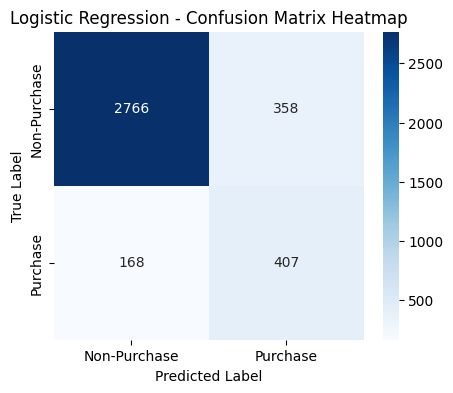

In [ ]:
# Compute confusion matrix from true and predicted labels
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Purchase', 'Purchase'],
            yticklabels=['Non-Purchase', 'Purchase'])
plt.title('Logistic Regression - Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

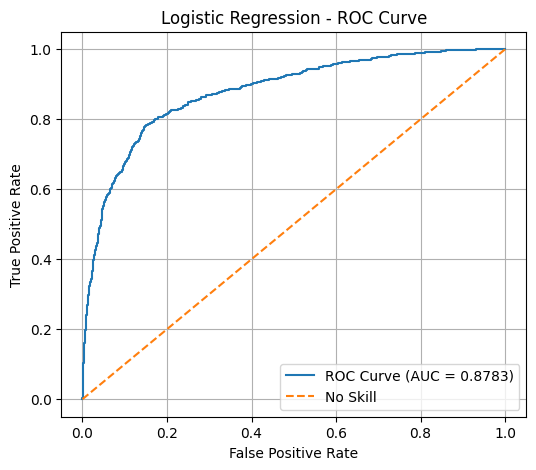

In [ ]:
# Get false positive rate, true positive rate for various thresholds
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_lr, tpr_lr, label=f'ROC Curve (AUC = {roc_auc_lr:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

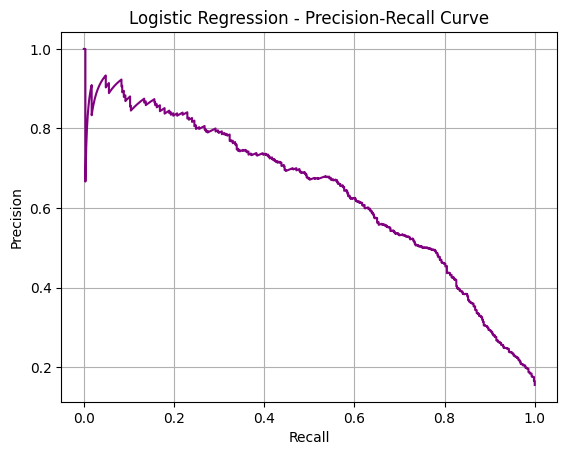

In [ ]:
# Calculate precision and recall values for various thresholds
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_lr)

# Plot the precision-recall curve
plt.plot(recall_lr, precision_lr, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression - Precision-Recall Curve')
plt.grid(True)
plt.show()

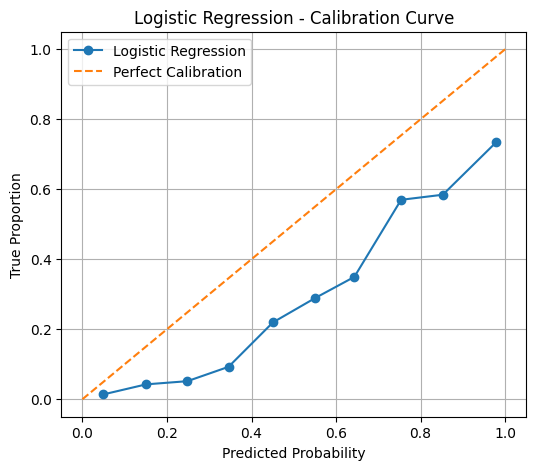

In [ ]:
# Calculate the calibration curve
prob_true_lr, prob_pred_lr = calibration_curve(y_test, y_proba_lr, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(6, 5))
plt.plot(prob_pred_lr, prob_true_lr, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.title('Logistic Regression - Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Proportion')
plt.legend()
plt.grid(True)
plt.show()

## Random Forest

In [ ]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train_scaled, y_train_resampled)

# Predict on test set
y_pred_rf = rf.predict(X_test_scaled)

# Predicted probabilities (for ROC-AUC)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Compute accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest - Accuracy Score: {accuracy_rf:.4f}")

Random Forest - Accuracy Score: 0.8819


In [ ]:
# Compute ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"Random Forest - ROC-AUC Score: {roc_auc_rf:.4f}")

Random Forest - ROC-AUC Score: 0.9195


In [ ]:
# Display classification report
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3124
           1       0.60      0.72      0.65       575

    accuracy                           0.88      3699
   macro avg       0.77      0.81      0.79      3699
weighted avg       0.89      0.88      0.89      3699



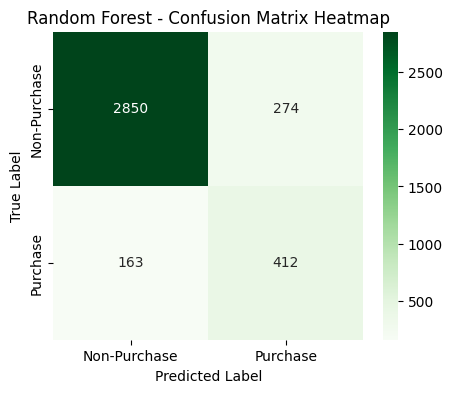

In [ ]:
# Compute confusion matrix from true and predicted labels
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Non-Purchase', 'Purchase'],
            yticklabels=['Non-Purchase', 'Purchase'])
plt.title('Random Forest - Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

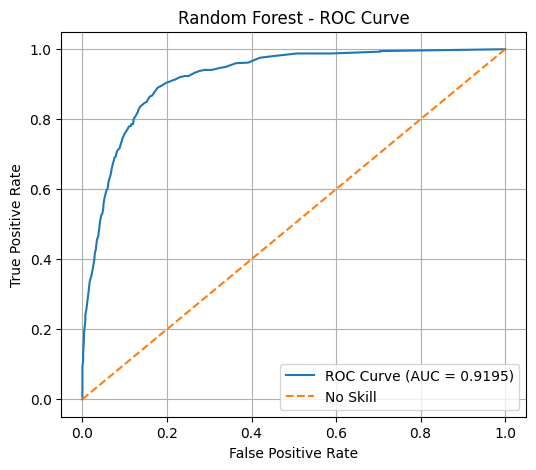

In [ ]:
# Get false positive rate, true positive rate for various thresholds
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label=f'ROC Curve (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

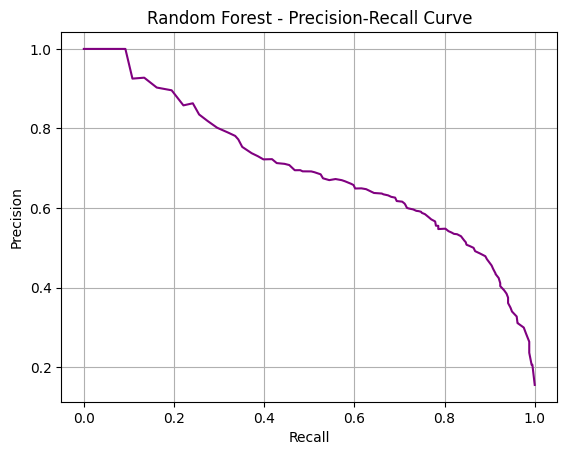

In [ ]:
# Calculate precision and recall values for various thresholds
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)

# Plot the precision-recall curve
plt.plot(recall_rf, precision_rf, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest - Precision-Recall Curve')
plt.grid(True)
plt.show()

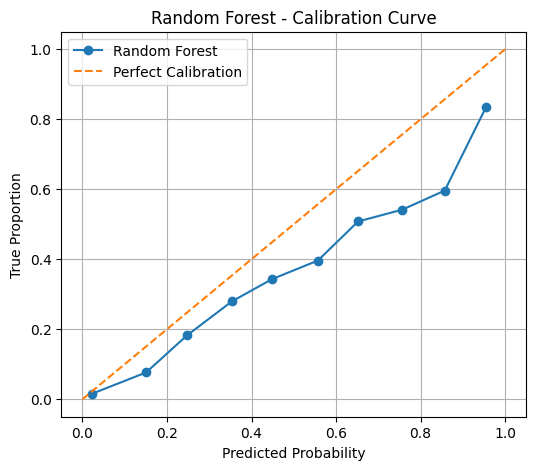

In [ ]:
# Calculate the calibration curve
prob_true_rf, prob_pred_rf = calibration_curve(y_test, y_proba_rf, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(6, 5))
plt.plot(prob_pred_rf, prob_true_rf, marker='o', label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.title('Random Forest - Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Proportion')
plt.legend()
plt.grid(True)
plt.show()

## Support Vector Classifier

In [ ]:
# Initialize SVC with probability estimates enabled
svc = SVC(probability=True)

# Train the model
svc.fit(X_train_scaled, y_train_resampled)

# Predict on test set
y_pred_svc = svc.predict(X_test_scaled)

# Predicted probabilities (for ROC-AUC)
y_proba_svc = svc.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Compute accuracy score
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC - Accuracy Score: {accuracy_svc:.4f}")

SVC - Accuracy Score: 0.8621


In [ ]:
# Compute ROC-AUC score
roc_auc_svc = roc_auc_score(y_test, y_proba_svc)
print(f"SVC - ROC-AUC Score: {roc_auc_svc:.4f}")

SVC - ROC-AUC Score: 0.8753


In [ ]:
# Display classification report
print("SVC - Classification Report:")
print(classification_report(y_test, y_pred_svc))

SVC - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3124
           1       0.55      0.68      0.61       575

    accuracy                           0.86      3699
   macro avg       0.74      0.79      0.76      3699
weighted avg       0.88      0.86      0.87      3699



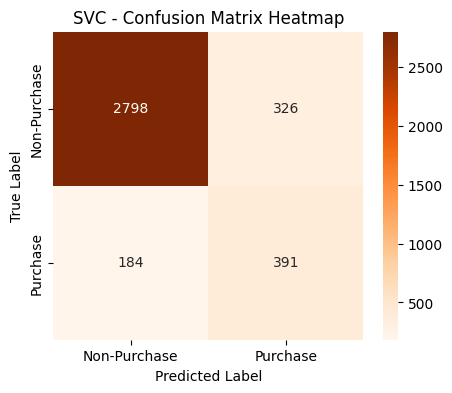

In [ ]:
# Compute confusion matrix from true and predicted labels
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Non-Purchase', 'Purchase'],
            yticklabels=['Non-Purchase', 'Purchase'])
plt.title('SVC - Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

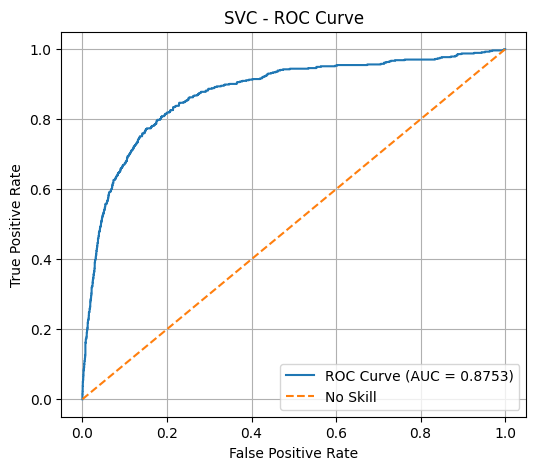

In [ ]:
# Get false positive rate, true positive rate for various thresholds
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_proba_svc)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_svc, tpr_svc, label=f'ROC Curve (AUC = {roc_auc_svc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC - ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

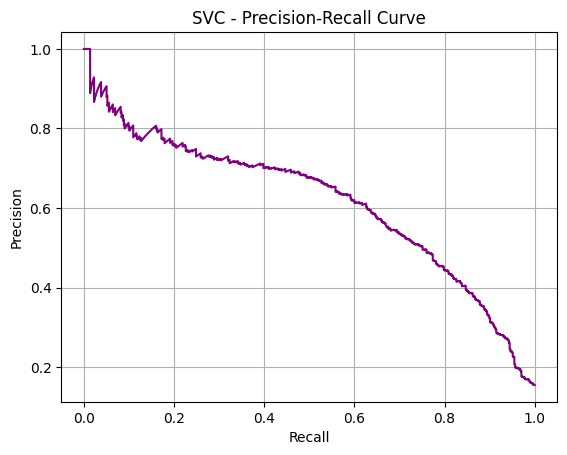

In [ ]:
# Calculate precision and recall values for various thresholds
precision_svc, recall_svc, _ = precision_recall_curve(y_test, y_proba_svc)

# Plot the precision-recall curve
plt.plot(recall_svc, precision_svc, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('SVC - Precision-Recall Curve')
plt.grid(True)
plt.show()

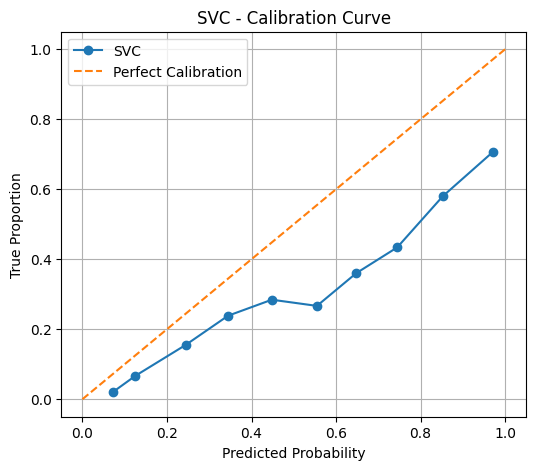

In [ ]:
# Calculate the calibration curve
prob_true_svc, prob_pred_svc = calibration_curve(y_test, y_proba_svc, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(6, 5))
plt.plot(prob_pred_svc, prob_true_svc, marker='o', label='SVC')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.title('SVC - Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Proportion')
plt.legend()
plt.grid(True)
plt.show()

## XGBoost

In [ ]:
# Initialize XGBoost Classifier
xgb = XGBClassifier()

# Train the model
xgb.fit(X_train_scaled, y_train_resampled)

# Predict on test set
y_pred_xgb = xgb.predict(X_test_scaled)

# Predicted probabilities (for ROC-AUC)
y_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Compute accuracy score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost - Accuracy Score: {accuracy_xgb:.4f}")

XGBoost - Accuracy Score: 0.8821


In [ ]:
# Compute ROC-AUC score
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f"XGBoost - ROC-AUC Score: {roc_auc_xgb:.4f}")

XGBoost - ROC-AUC Score: 0.9119


In [ ]:
# Display classification report
print("XGBoost - Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3124
           1       0.61      0.69      0.64       575

    accuracy                           0.88      3699
   macro avg       0.77      0.80      0.79      3699
weighted avg       0.89      0.88      0.88      3699



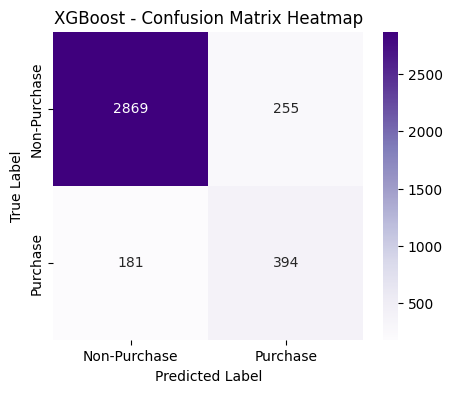

In [ ]:
# Compute confusion matrix from true and predicted labels
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Non-Purchase', 'Purchase'],
            yticklabels=['Non-Purchase', 'Purchase'])
plt.title('XGBoost - Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

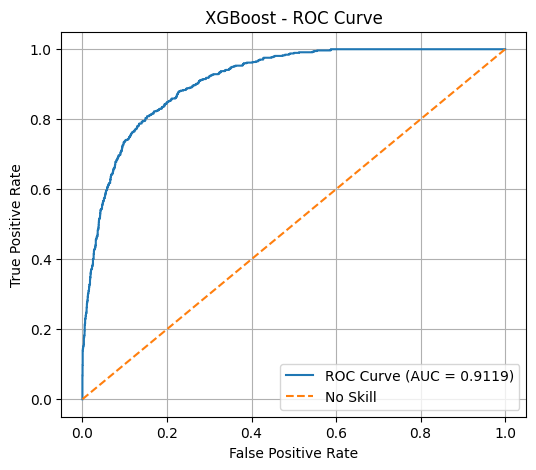

In [ ]:
# Get false positive rate, true positive rate for various thresholds
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC Curve (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

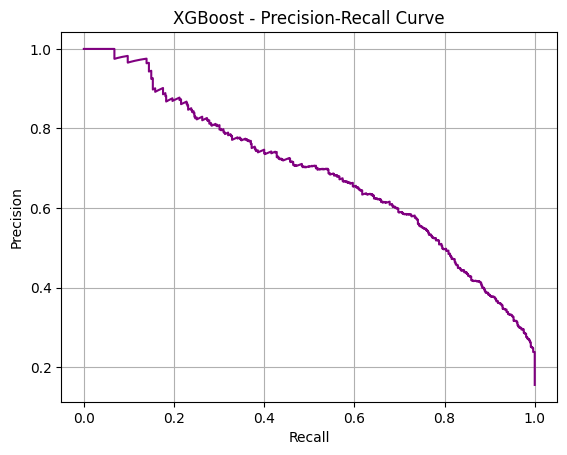

In [ ]:
# Calculate precision and recall values for various thresholds
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_proba_xgb)

# Plot the precision-recall curve
plt.plot(recall_xgb, precision_xgb, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost - Precision-Recall Curve')
plt.grid(True)
plt.show()

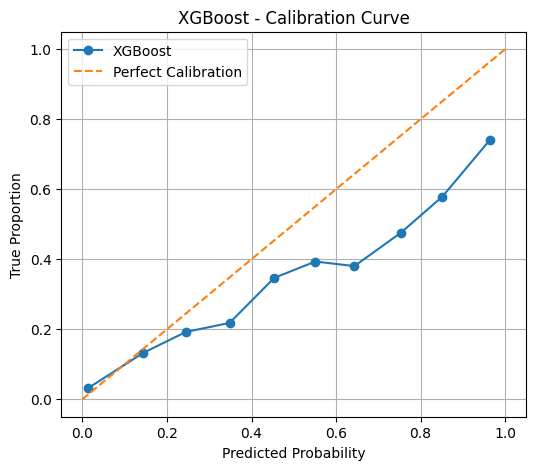

In [ ]:
# Calculate the calibration curve
prob_true_xgb, prob_pred_xgb = calibration_curve(y_test, y_proba_xgb, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(6, 5))
plt.plot(prob_pred_xgb, prob_true_xgb, marker='o', label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.title('XGBoost - Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Proportion')
plt.legend()
plt.grid(True)
plt.show()

## LightGBM

In [ ]:
# Initialize LightGBM Classifier
lgbm = LGBMClassifier()

# Train the model
lgbm.fit(X_train_scaled, y_train_resampled)

# Predict on test set
y_pred_lgbm = lgbm.predict(X_test_scaled)

# Predicted probabilities (for ROC-AUC)
y_proba_lgbm = lgbm.predict_proba(X_test_scaled)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 7298, number of negative: 7298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2098
[LightGBM] [Info] Number of data points in the train set: 14596, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Compute accuracy score
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM - Accuracy Score: {accuracy_lgbm:.4f}")

LightGBM - Accuracy Score: 0.8870


In [ ]:
# Compute ROC-AUC score
roc_auc_lgbm = roc_auc_score(y_test, y_proba_lgbm)
print(f"LightGBM - ROC-AUC Score: {roc_auc_lgbm:.4f}")

LightGBM - ROC-AUC Score: 0.9215


In [ ]:
# Display classification report
print("LightGBM - Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3124
           1       0.62      0.72      0.67       575

    accuracy                           0.89      3699
   macro avg       0.78      0.82      0.80      3699
weighted avg       0.90      0.89      0.89      3699



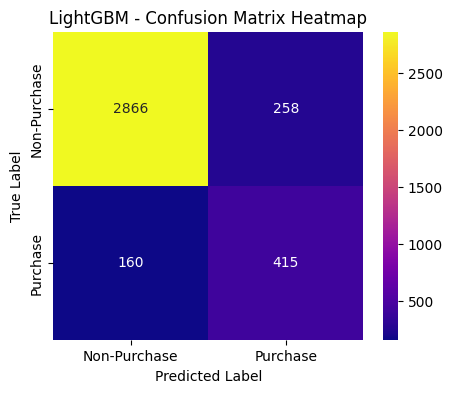

In [ ]:
# Compute confusion matrix from true and predicted labels
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='plasma',
            xticklabels=['Non-Purchase', 'Purchase'],
            yticklabels=['Non-Purchase', 'Purchase'])
plt.title('LightGBM - Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

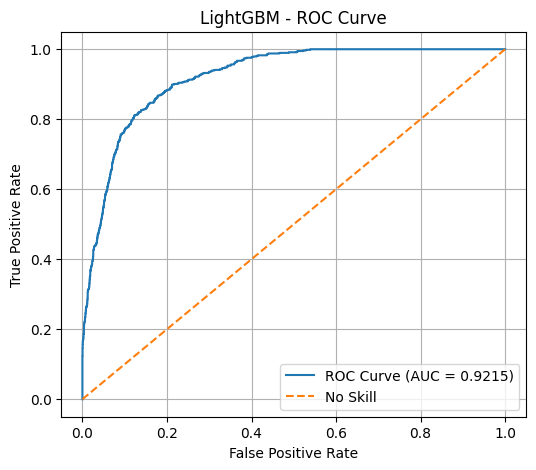

In [ ]:
# Get false positive rate, true positive rate for various thresholds
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_proba_lgbm)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_lgbm, tpr_lgbm, label=f'ROC Curve (AUC = {roc_auc_lgbm:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM - ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

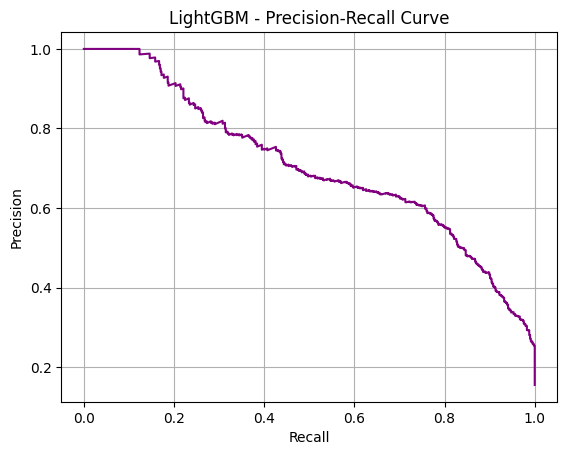

In [ ]:
# Calculate precision and recall values for various thresholds
precision_lgbm, recall_lgbm, _ = precision_recall_curve(y_test, y_proba_lgbm)

# Plot the precision-recall curve
plt.plot(recall_lgbm, precision_lgbm, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LightGBM - Precision-Recall Curve')
plt.grid(True)
plt.show()

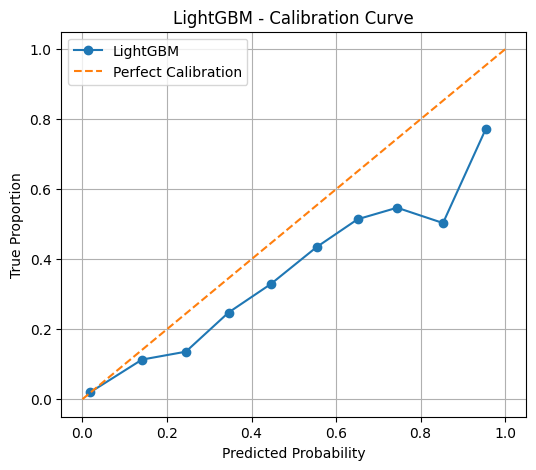

In [ ]:
# Calculate the calibration curve
prob_true_lgbm, prob_pred_lgbm = calibration_curve(y_test, y_proba_lgbm, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(6, 5))
plt.plot(prob_pred_lgbm, prob_true_lgbm, marker='o', label='LightGBM')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.title('LightGBM - Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Proportion')
plt.legend()
plt.grid(True)
plt.show()

## Decision Tree

In [ ]:
# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train_scaled, y_train_resampled)

# Predict on test set
y_pred_dt = dt.predict(X_test_scaled)

# Predicted probabilities (for ROC-AUC)
y_proba_dt = dt.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Compute accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree - Accuracy Score: {accuracy_dt:.4f}")

Decision Tree - Accuracy Score: 0.8521


In [ ]:
# Compute ROC-AUC score
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
print(f"Decision Tree - ROC-AUC Score: {roc_auc_dt:.4f}")

Decision Tree - ROC-AUC Score: 0.7711


In [ ]:
# Display classification report
print("Decision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3124
           1       0.52      0.66      0.58       575

    accuracy                           0.85      3699
   macro avg       0.73      0.77      0.75      3699
weighted avg       0.87      0.85      0.86      3699



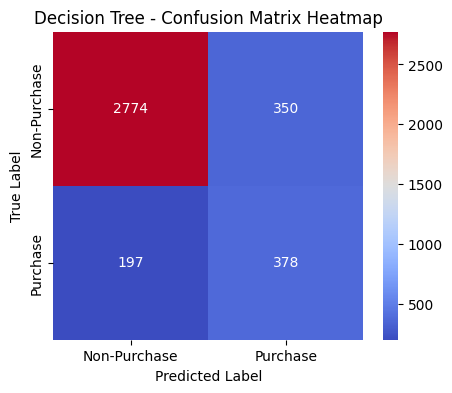

In [ ]:
# Compute confusion matrix from true and predicted labels
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Non-Purchase', 'Purchase'],
            yticklabels=['Non-Purchase', 'Purchase'])
plt.title('Decision Tree - Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

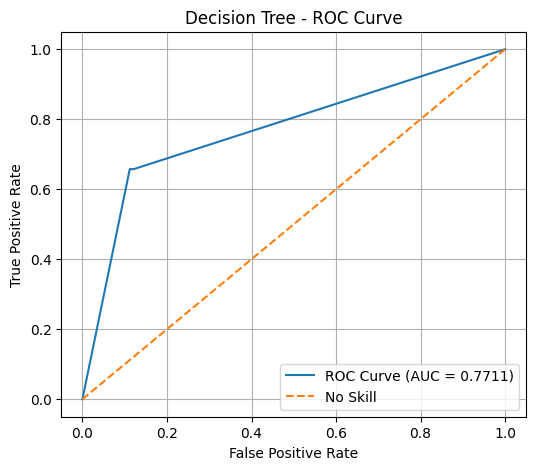

In [ ]:
# Get false positive rate, true positive rate for various thresholds
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_dt, tpr_dt, label=f'ROC Curve (AUC = {roc_auc_dt:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

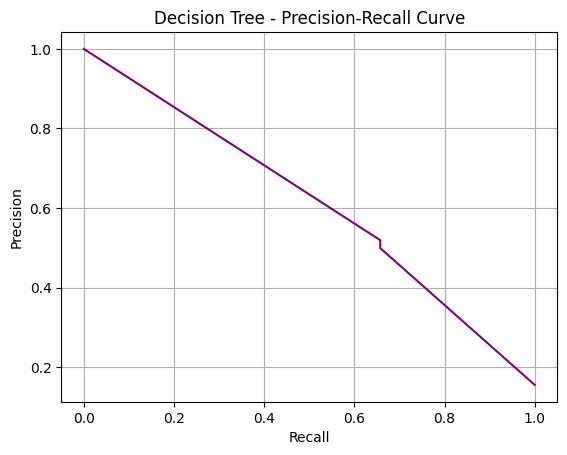

In [ ]:
# Calculate precision and recall values for various thresholds
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_proba_dt)

# Plot the precision-recall curve
plt.plot(recall_dt, precision_dt, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Decision Tree - Precision-Recall Curve')
plt.grid(True)
plt.show()

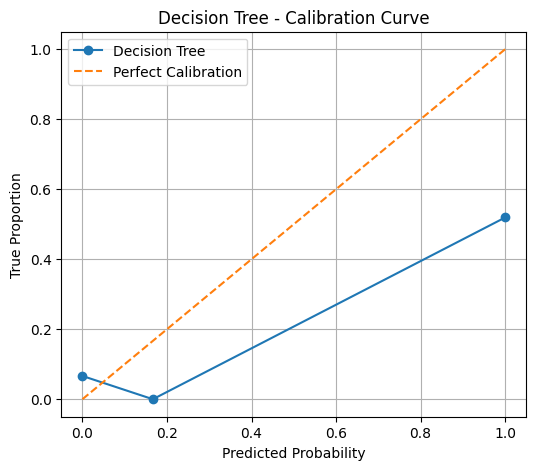

In [ ]:
# Calculate the calibration curve
prob_true_dt, prob_pred_dt = calibration_curve(y_test, y_proba_dt, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(6, 5))
plt.plot(prob_pred_dt, prob_true_dt, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.title('Decision Tree - Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Proportion')
plt.legend()
plt.grid(True)
plt.show()

# Final Results

In [ ]:
# Calculate metrics for each model including Decision Tree and LightGBM
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVC', 'XGBoost', 'LightGBM', 'Decision Tree'],
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_svc, accuracy_xgb, accuracy_lgbm, accuracy_dt],
    'Precision': [precision_score(y_test, y_pred_lr),
                  precision_score(y_test, y_pred_rf),
                  precision_score(y_test, y_pred_svc),
                  precision_score(y_test, y_pred_xgb),
                  precision_score(y_test, y_pred_lgbm),
                  precision_score(y_test, y_pred_dt)],
    'Recall': [recall_score(y_test, y_pred_lr),
               recall_score(y_test, y_pred_rf),
               recall_score(y_test, y_pred_svc),
               recall_score(y_test, y_pred_xgb),
               recall_score(y_test, y_pred_lgbm),
               recall_score(y_test, y_pred_dt)],
    'F1-Score': [f1_score(y_test, y_pred_lr),
                 f1_score(y_test, y_pred_rf),
                 f1_score(y_test, y_pred_svc),
                 f1_score(y_test, y_pred_xgb),
                 f1_score(y_test, y_pred_lgbm),
                 f1_score(y_test, y_pred_dt)],
    'ROC-AUC': [roc_auc_lr, roc_auc_rf, roc_auc_svc, roc_auc_xgb, roc_auc_lgbm, roc_auc_dt]
})

# Display the updated summary table
print(results)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.857799   0.532026  0.707826  0.607463  0.878326
1        Random Forest  0.881860   0.600583  0.716522  0.653450  0.919467
2                  SVC  0.862125   0.545328  0.680000  0.605263  0.875277
3              XGBoost  0.882130   0.607088  0.685217  0.643791  0.911901
4             LightGBM  0.886996   0.616642  0.721739  0.665064  0.921479
5        Decision Tree  0.852122   0.519231  0.657391  0.580200  0.771088
